In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

In [2]:
from wind_tools import *
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
sns.set()
import plotly.express as px


In [3]:
proc_dir = Path("/run/media/simone/Simone DATI/TRISONICA_DATA/Processed/")
trs1_path = proc_dir / "TRS1_ep_fixed_axes_ago_sept" / "eddypro_TRS_1_fixed_axes_full_output_2019-12-30T133606_exp.csv"
trs2_uncor_path = proc_dir / "TRS2_cor" / "eddypro_TRS_2_uncor_full_output_2019-12-21T140050_exp.csv"
wm1_path = proc_dir / "WM1_ago_sept" / "eddypro_WM1_full_output_2019-12-20T105458_exp.csv"
wm2_path = proc_dir / "WM1_ago_sept" / "eddypro_WM2_full_output_2019-12-20T124352_exp.csv"
cache_dir = Path("./processed_data")
start_date = '2018-08-10'
end_date = '2018-08-13'  # after 14 problems with TRS2

In [4]:
wm1, wm2, trs1, trs2 = map(
    lambda p: load_ep_cache(p).loc[start_date:end_date].loc[:,wind_cols].rename(columns=wind_comp_rename),
    [wm1_path, wm2_path, trs1_path, trs2_uncor_path])


In [6]:
wm1

,u,v,w,wind_speed,wind_dir
date_time,,,,,
2018-08-10 00:00:00,0.193723,0.279797,-0.040250,0.342688,70.18500
2018-08-10 00:05:00,-0.090905,-0.006743,-0.011260,0.091848,324.05700
2018-08-10 00:10:00,0.137993,0.236240,0.002430,0.273601,63.15740
2018-08-10 00:15:00,0.428760,0.341897,-0.038427,0.549732,88.82570
2018-08-10 00:20:00,-0.070555,0.197060,-0.000057,0.209310,7.57064
...,...,...,...,...,...
2018-08-13 23:35:00,0.247590,0.311400,-0.007867,0.397910,68.55510
2018-08-13 23:40:00,0.400170,0.392130,-0.017203,0.560534,87.19810
2018-08-13 23:45:00,-0.165030,-0.273583,-0.040067,0.322006,256.32400


In [ ]:
# %% hack: add plot metadata 
trs2.plot_info = {'label': 'TRS2 cor', 'color': "royalblue"}
wm1.plot_info = {'label': 'WM1', 'color': 'lightgreen'}
wm2.plot_info = {'label': 'WM2', 'color': 'darkgreen'}
trs1.plot_info = {'label': 'TRS1', 'color': 'orange'}

# TRS2 axes rotation

In [22]:
def rotate_ang(df, ang):
    wind_dir, wind_speed = cart2pol(df.u, df.v)
    wind_dir += np.deg2rad(ang)
    return pol2cart(wind_dir, wind_speed)

In [23]:
rotate_ang(wm1[:10], 180)[1]

date_time
2018-08-10 00:00:00   -0.279797
2018-08-10 00:05:00    0.006743
2018-08-10 00:10:00   -0.236240
2018-08-10 00:15:00   -0.341897
2018-08-10 00:20:00   -0.197060
2018-08-10 00:25:00   -0.211950
2018-08-10 00:30:00   -0.208107
2018-08-10 00:35:00    0.077013
2018-08-10 00:40:00    0.070733
2018-08-10 00:45:00   -0.185532
dtype: float64

In [25]:
def rotate_matrix(df, ang):
    ang = np.deg2rad(ang)
    rot_mat = np.array([[np.cos(ang), -np.sin(ang)],
                       [np.sin(ang), np.cos(ang)]])
    return np.matmul(df[['u', 'v']], rot_mat)

In [26]:
rotate_matrix(wm1[:10], 180)

,u,v
date_time,,
2018-08-10 00:00:00,-0.193723,-0.279797
2018-08-10 00:05:00,0.090905,0.006743
2018-08-10 00:10:00,-0.137993,-0.236240
2018-08-10 00:15:00,-0.428760,-0.341897
2018-08-10 00:20:00,0.070555,-0.197060
2018-08-10 00:25:00,-0.036227,-0.211950
2018-08-10 00:30:00,-0.149150,-0.208107
2018-08-10 00:35:00,0.209390,0.077013
2018-08-10 00:40:00,0.191850,0.070733


In [27]:
%timeit rotate_matrix(wm1, 78)

1.04 ms ± 49.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [28]:
%timeit rotate_ang(wm1, 78)

2.02 ms ± 182 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
wm1[:10]

,u,v,w,wind_speed,wind_dir
date_time,,,,,
2018-08-10 00:00:00,0.193723,0.279797,-0.040250,0.342688,70.18500
2018-08-10 00:05:00,-0.090905,-0.006743,-0.011260,0.091848,324.05700
2018-08-10 00:10:00,0.137993,0.236240,0.002430,0.273601,63.15740
2018-08-10 00:15:00,0.428760,0.341897,-0.038427,0.549732,88.82570
2018-08-10 00:20:00,-0.070555,0.197060,-0.000057,0.209310,7.57064
2018-08-10 00:25:00,0.036227,0.211950,-0.044640,0.219609,44.61870
2018-08-10 00:30:00,0.149150,0.208107,-0.078033,0.267663,70.01830
2018-08-10 00:35:00,-0.209390,-0.077013,0.043663,0.227336,291.54100
2018-08-10 00:40:00,-0.191850,-0.070733,-0.001913,0.204483,294.20000


In [ ]:
def fix_axes_trs2(df):
    """applies axes remap and rotations for a vertically mounted TRS, see notes.MD"""
    df = df.copy()
    df = rotate_ang(df, angle=45)
    df.u, df.v, df.w = -df.u, -df.w, df.v
    return df

# test diffences between wind dir

In [16]:
def add_wind_dir(df: pd.DataFrame) -> pd.DataFrame:
    print("warning add_wind_dir is not the same of EddyPro")
    df = df.copy()
    df['wind_dir'] = np.rad2deg(np.arctan2(df.v, df.u)) % 360
    return df

In [17]:
wm1_newdir = add_wind_dir(wm1)

warning add_wind_dir is not the same of EddyPro


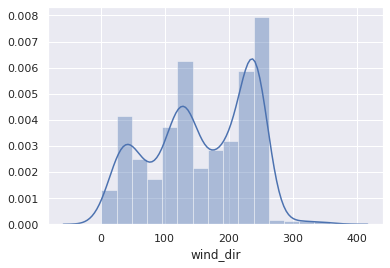

In [20]:
wm1_newdir.wind_dir; sns.distplot(wm1_newdir.wind_dir)

In [6]:
wm1_newdir.wind_dir = fix_quadrant(wm1_newdir); wm1_newdir

,u,v,w,wind_speed,wind_dir
date_time,,,,,
2018-08-10 00:00:00,0.193723,0.279797,-0.040250,0.342688,179.806277
2018-08-10 00:05:00,-0.090905,-0.006743,-0.011260,0.091848,180.090905
2018-08-10 00:10:00,0.137993,0.236240,0.002430,0.273601,179.862007
2018-08-10 00:15:00,0.428760,0.341897,-0.038427,0.549732,179.571240
2018-08-10 00:20:00,-0.070555,0.197060,-0.000057,0.209310,180.070555
...,...,...,...,...,...
2018-08-13 23:35:00,0.247590,0.311400,-0.007867,0.397910,179.752410
2018-08-13 23:40:00,0.400170,0.392130,-0.017203,0.560534,179.599830
2018-08-13 23:45:00,-0.165030,-0.273583,-0.040067,0.322006,180.165030


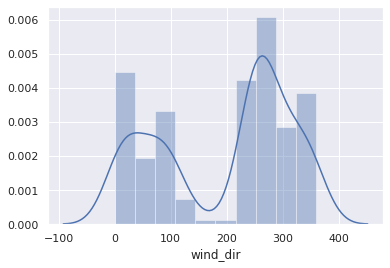

In [7]:
sns.distplot(wm1.wind_dir)

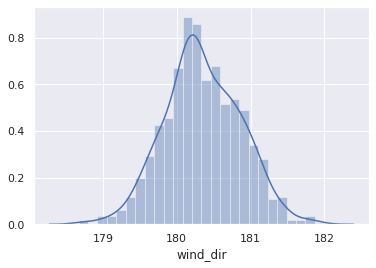

In [9]:
sns.distplot(wm1_newdir.wind_dir)

In [38]:
(wm1_newdir.wind_dir - wm1.wind_dir).pow(2).mean()

14191.98400804207

# other

u               0.078565
v               0.097066
w               0.113721
wind_speed      0.128325
wind_dir      219.832412
dtype: float64
u             -0.160256
v             -0.129364
w             -0.074060
wind_speed    -0.123281
wind_dir     -62.444494
dtype: float64


<IPython.core.display.Javascript object>


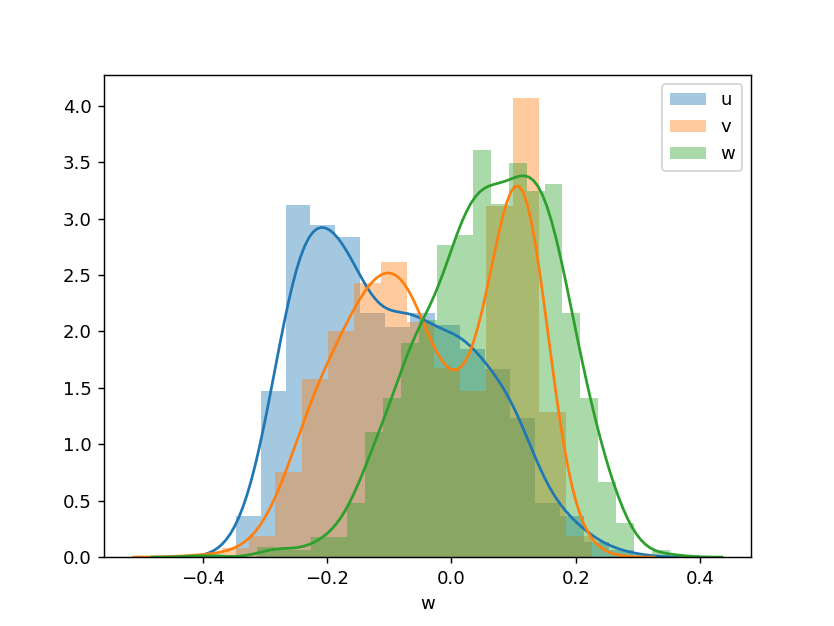

<IPython.core.display.Javascript object>


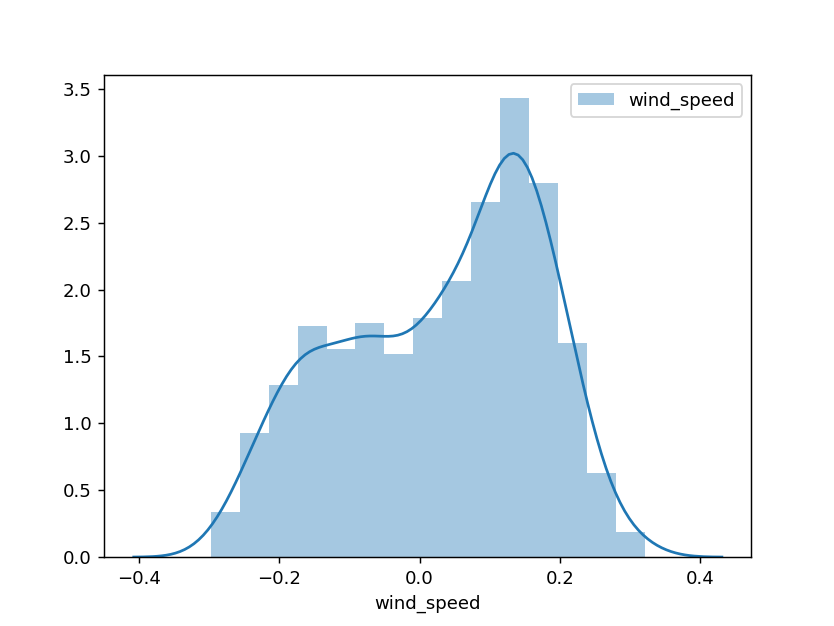

In [7]:
# ------------------------plots section----------------------
# %%
df1 = wm1-trs1

print(np.mean(df1[df1 > 0]))
print(np.mean(df1[df1 < 0]))
plot_dist_comp(df1, ['u', 'v', 'w'])
plot_dist_comp(df1, ['wind_speed'])

<IPython.core.display.Javascript object>


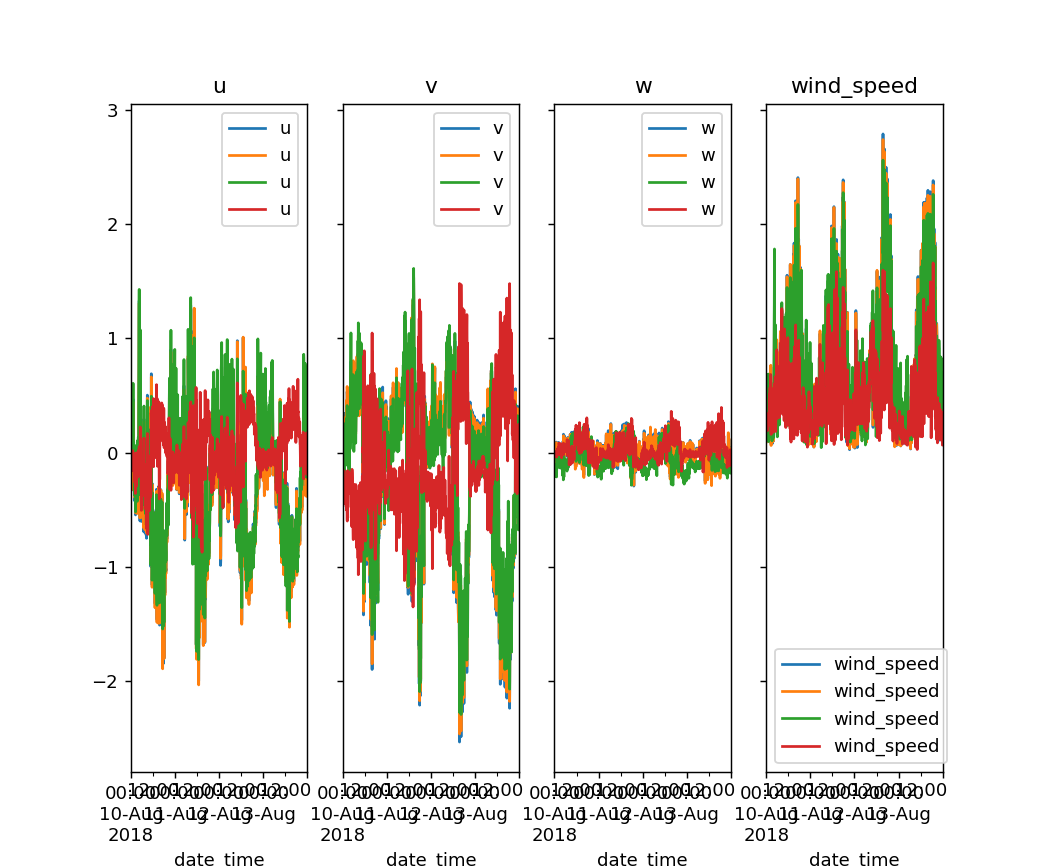

<IPython.core.display.Javascript object>


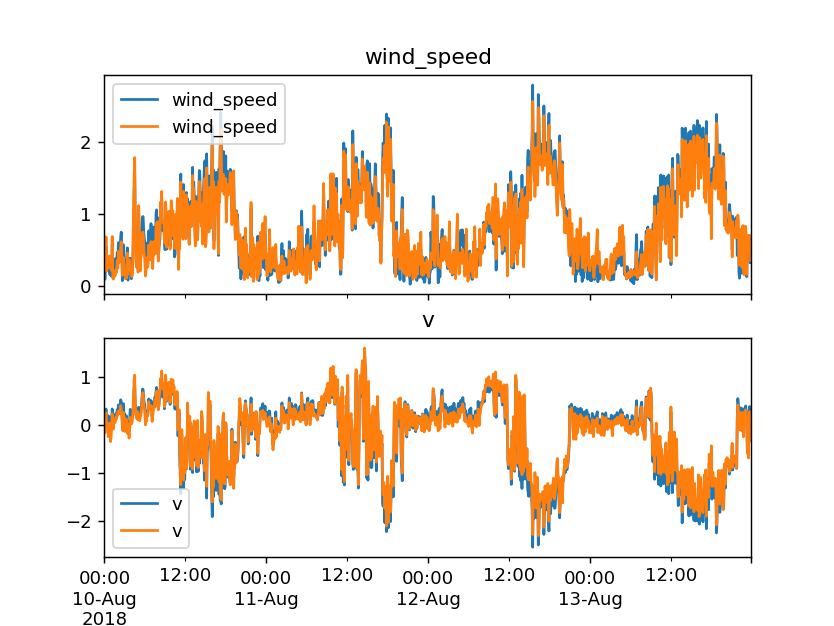

<IPython.core.display.Javascript object>


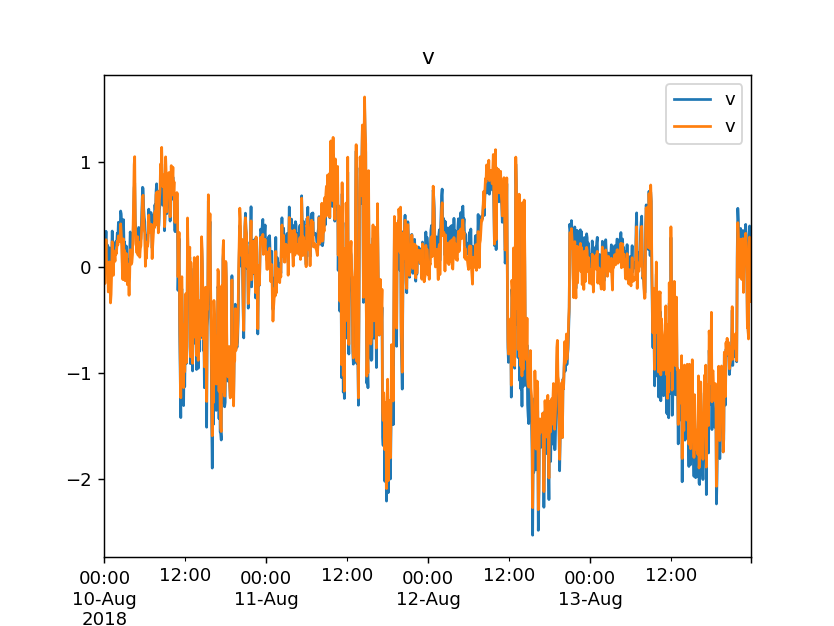

<IPython.core.display.Javascript object>


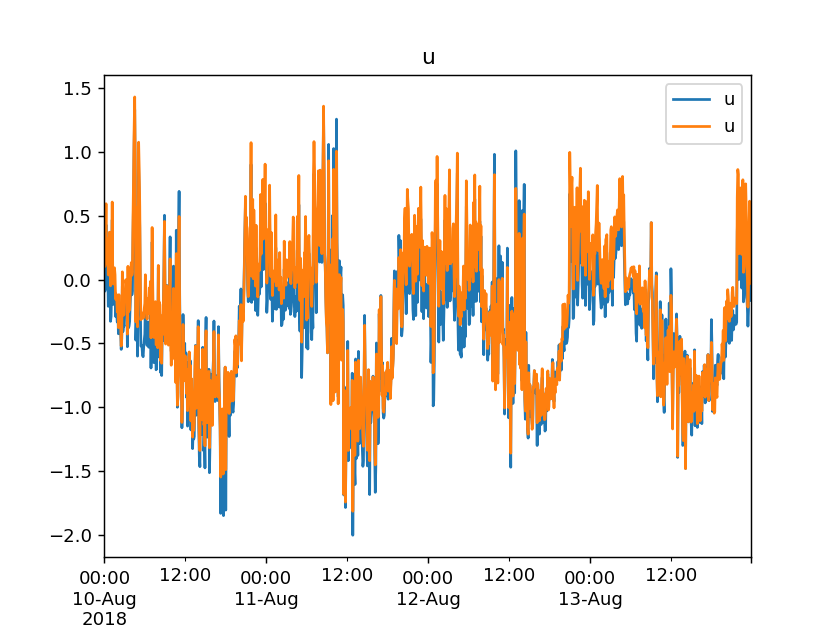

<IPython.core.display.Javascript object>


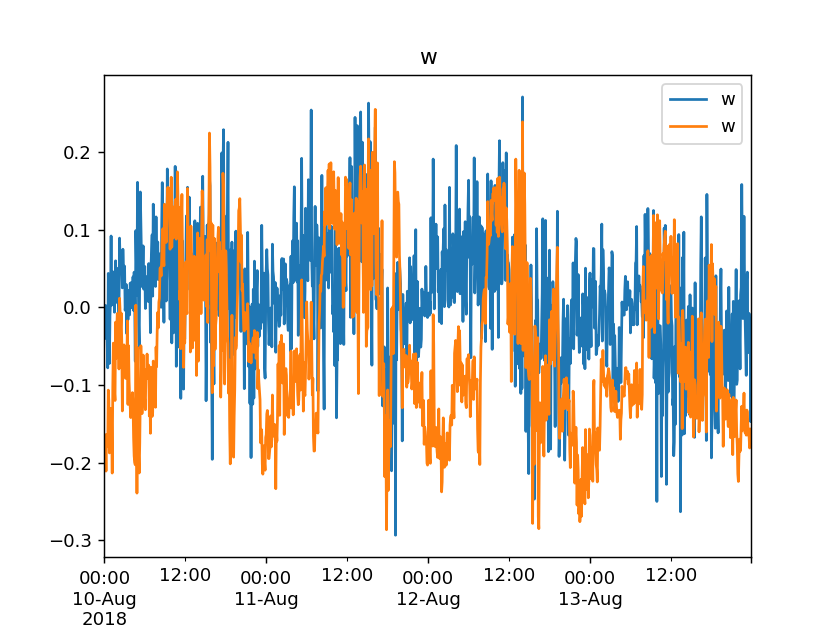

<IPython.core.display.Javascript object>


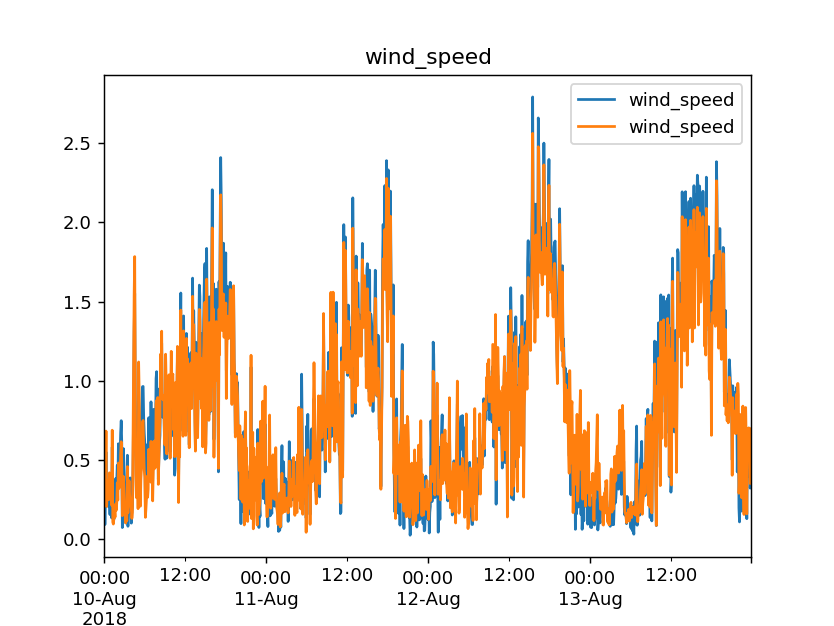

<IPython.core.display.Javascript object>


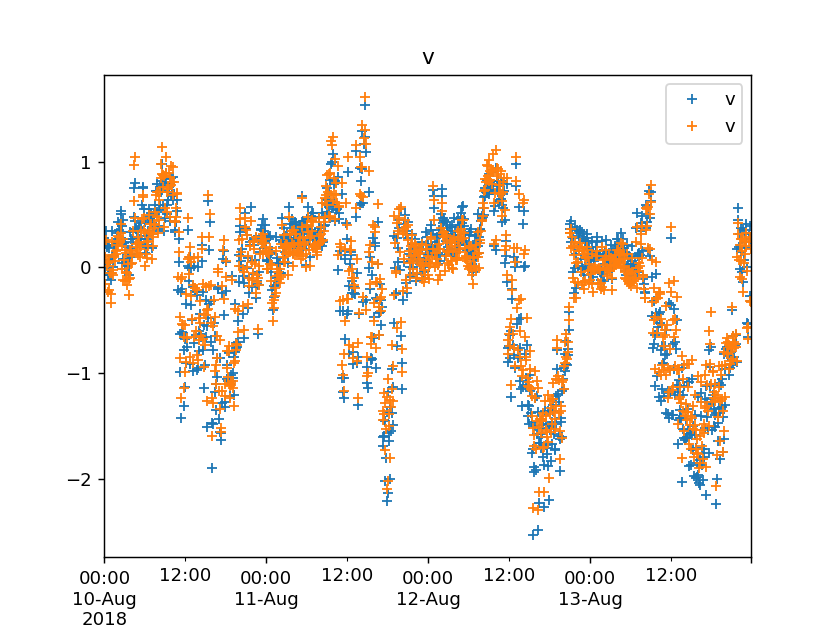

In [8]:
# %%
plot_components([wm1, wm2, trs1, trs2], ['u', 'v', 'w','wind_speed'])
plot_components([wm1, trs1], ['wind_speed', 'v'], vertical=False)
plot_components([wm1, trs1], ['v'])
plot_components([wm1, trs1], ['u'])
plot_components([wm1, trs1], ['w'])
plot_components([wm1, trs1], ['wind_speed'])
plot_components([wm1, trs1], ['v'], style='+')


In [ ]:
# %%
# taking 30° range both north and south, wm1fa -> wm1 filtered angles
filt_angles = filter_by_wind_dir(wm1, 15)
wm1fa = wm1.loc[filt_angles]
trs2fa = trs2.loc[filt_angles]
trs2fa.plot_info = {'label': 'TRS2 uncor', 'color': "royalblue"}
wm1fa.plot_info = {'label': 'WM1', 'color': 'lightgreen'}
# %%
def fix_axes_trs2(df):
    """applies axes remap and rotations for a vertically mounted TRS, see notes.MD"""
    df = df.copy()
    df = rotate_u_v(df, angle=-np.pi/4)
    df.u, df.v, df.w = -df.u, -df.w, df.v
    return df


In [ ]:
# %%
trs2r = trs2fa.pipe(fix_axes_trs2)
trs2r.plot_info = {'label': 'TRS2 cor', 'color': "royalblue"}
wm1 = wm1.pipe(add_angle_attack)
# %%
plot_components([wm1], ['angle_attack'])
plot_components([wm1fa, trs2r], ['u','v', 'w'], style='*-')

In [2]:
plot_components([wm1fa, trs2fa,], ['wind_speed', ], style=":o")
plot_components([wm1fa, trs2fa], ['w'], style=":o")
plot_components([wm1fa, trs2fa], ['wind_dir'], style='*')
# %% reference plot for TRS2 with fixed angles
fig1fa, ax1fa = plt.subplots(1,1)
wm1.wind_speed.plot(ax=ax1fa, **wm1.plot_info, style="+--")

# scaled_dir = wm1fa.wind_dir / 180
wm1fa.wind_speed.plot(ax=ax1fa, legend="Wind direction between 30° north or south", color="darkgreen", marker="o", linestyle="")
trs2fa.wind_speed.plot(ax=ax1fa, legend="Wind direction between 30° north or south", color="blue", marker="o", linestyle="")
trs2.wind_speed.plot(ax=ax1fa, **trs2.plot_info)
ax1fa.legend()
# %%
fig2fa, ax2fa = plt.subplots(1,1)
ax2fa.scatter(wm1fa.wind_speed, trs2fa.wind_speed)

# %%
fig = px.line(y=wm1.wind_speed, x=wm1.index)
fig.show()
# %%
nan_filter = ~(wm1.wind_speed.isna() | wm2.wind_speed.isna() | trs1.wind_speed.isna())
wm1 = wm1[nan_filter]
wm2 = wm2[nan_filter]
trs1 = trs1[nan_filter]
# %%
# plt.plot(trs2.wind_speed, label="TRS 2")
plt.plot(wm1.wind_speed, label="WM 1", color="lightgreen")
plt.plot(wm2.wind_speed, label="WM 2", color="darkgreen")

plt.plot(trs1.wind_speed, label="TRS 1", color="orangered")
# plt.bar(wm1.index, wm1.wind_speed - trs1.wind_speed)
plt.legend()
plt.tight_layout()
# %%

sns.distplot(wm1.wind_speed, color="lightgreen", label="WM 1")
sns.distplot(trs1.wind_speed, color="orangered", label="TRS 1")
plt.legend()
# %%
# plt.plot(trs1.u_rot, label="U trs1")
# plt.plot(trs2.u_rot, label="U trs2")
#
# plt.plot(trs1.v_rot, label="V trs1")
# plt.plot(trs2.v_rot, label="V trs2")
#
# plt.plot(trs1.w_rot, label="W trs1")
# plt.plot(trs2.w_rot, label="W trs2")
#
# plt.legend()

# %% windrose test

from windrose import WindroseAxes
import matplotlib.cm as cm
import numpy as np
ax1,ax2, ax3 = [ WindroseAxes.from_ax() for i  in range(3)]

ax1.bar(trs1.wind_dir, trs1.wind_speed, normed=True, opening=0.6, bins=8, label="Trisonica")
ax2.bar(wm1.wind_dir, wm1.wind_speed, normed=True, bins=8,label="Wind Master 1", opening=0.6)
ax3.bar(wm1.wind_dir, wm1.wind_speed, normed=True, bins=8,label="Wind Master 1", opening=0.6)
ax1.legend()
ax2.legend()
ax3.legend()
# # %% plotly express
# import plotly.express as px
#
# fig = px.bar_polar(trs1, r="wind_speed", theta="wind_dir")
# fig.show()
#
# # %% check vertical speed
# def add_dir_vert(df):
#     tot_hor = np.sqrt(df.u**2+df.v**2)
#     df['wind_dir_vert'] = np.arctan(df.w/tot_hor) * 180 / np.pi
#     return df
# def add_wind_u_w(df):
#     df['wind_speed_u_w'] = np.sqrt(df.u**2+df.w**2)
#
# add_dir_vert(wm1)
# wm1dv, trs1vd = [df.pipe(add_wind_u_w) for df in [wm1, trs1]]
#
# # wm1wv =
# # %%
# dfp = pd.DataFrame({"wm1_ws": wm1.wind_speed, "wm1_wd": wm1.wind_dir,
#                     "trs1_ws": trs1.wind_speed, "trs1_wd": trs1.wind_dir})





data_preprocessing.py  notes.MD         __pycache__/              wind_tools.py
EddyPro/               plots/           test_data/
import_data.py         processed_data/  trisonica-analisys.ipynb
